Keras DNN으로 집값 예측하기

#1. input package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

from time import time
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


MY_HIDDEN = 1000
MY_EPOCH = 500
MY_BATCH = 5

#2. data processing

In [2]:
heading = ['CRIM', 'ZM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
raw = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [3]:
print('원본 데이터 출력')
print(raw.head(10))

print('원본 데이터 통계')
print(raw.describe())

원본 데이터 출력
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2
5  0.02985   0.0   2.18     0  0.458  ...    3  222     18.7   5.21  28.7
6  0.08829  12.5   7.87     0  0.524  ...    5  311     15.2  12.43  22.9
7  0.14455  12.5   7.87     0  0.524  ...    5  311     15.2  19.15  27.1
8  0.21124  12.5   7.87     0  0.524  ...    5  311     15.2  29.93  16.5
9  0.17004  12.5   7.87     0  0.524  ...    5  311     15.2  17.10  18.9

[10 rows x 13 columns]
원본 데이터 통계
             CRIM          ZN       INDUS  ...     PTRATIO       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000 

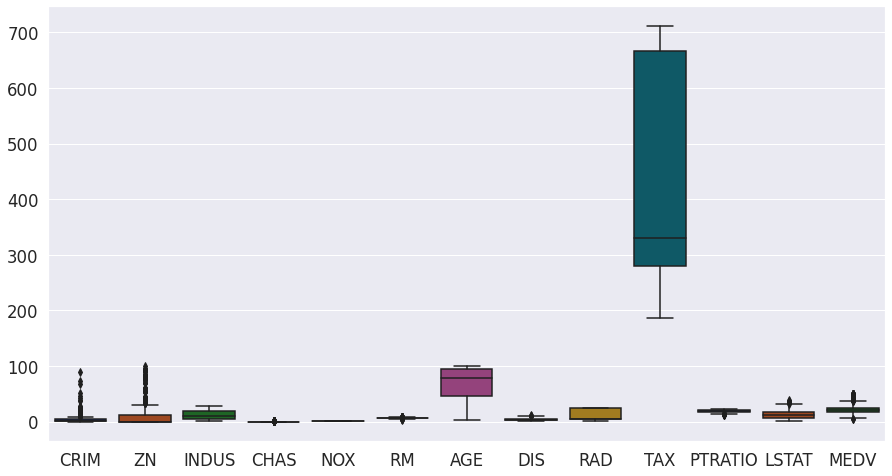

In [4]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
sns.boxplot(data = raw, palette = 'dark')
plt.show()

In [5]:
scaler = StandardScaler()
z_data = scaler.fit_transform(raw)

print(type(raw))
print(type(z_data))

#pandas to numpy reshape
z_data = pd.DataFrame(z_data, columns=heading)
print(type(z_data))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
print('원본 데이터 출력')
print(z_data.head(10))

print('원본 데이터 통계')
print(z_data.describe())

원본 데이터 출력
       CRIM        ZM     INDUS  ...   PTRATIO     LSTAT      MEDV
0 -0.419782  0.284830 -1.287909  ... -1.459000 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381  ... -0.303094 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381  ... -0.303094 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878  ...  0.113032 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878  ...  0.113032 -1.026501  1.487503
5 -0.417044 -0.487722 -1.306878  ...  0.113032 -1.043322  0.671222
6 -0.410243  0.048772 -0.476654  ... -1.505237 -0.031268  0.039964
7 -0.403696  0.048772 -0.476654  ... -1.505237  0.910700  0.497082
8 -0.395935  0.048772 -0.476654  ... -1.505237  2.421774 -0.656595
9 -0.400729  0.048772 -0.476654  ... -1.505237  0.623344 -0.395385

[10 rows x 13 columns]
원본 데이터 통계
               CRIM            ZM  ...         LSTAT          MEDV
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean  -8.688702e-17  3.306534e-16  ... -1.595123e-16 -4.247810e-16
std    1.000990e+0

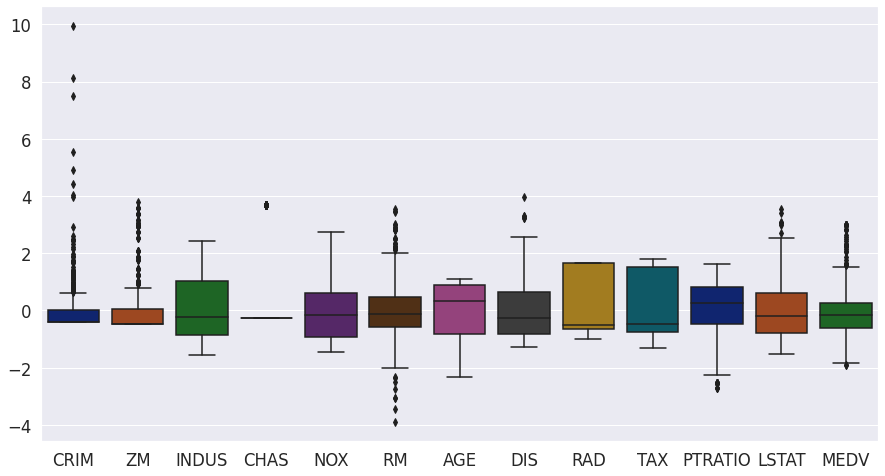

In [7]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
sns.boxplot(data = z_data, palette = 'dark')
plt.show()

In [8]:
print('\n분리 전 데이터 모양 : ', z_data.shape)
x_data = z_data.drop('MEDV', axis=1)
x_data = x_data.drop('CRIM', axis=1)


y_data = z_data['MEDV']
print('-----분리후-----')
print(x_data.shape)
print(y_data.shape)
X_train, X_test, Y_train, Y_test =  \
  train_test_split(x_data, y_data, test_size = 0.3)


분리 전 데이터 모양 :  (506, 13)
-----분리후-----
(506, 11)
(506,)


In [9]:
print('학습용 입력 데이터 모양 : ', X_train.shape)
print('학습용 출력 데이터 모양 : ', Y_train.shape)
print('평가용 입력 데이터 모양 : ', X_test.shape)
print('평가용 출력 데이터 모양 : ', Y_test.shape)

학습용 입력 데이터 모양 :  (354, 11)
학습용 출력 데이터 모양 :  (354,)
평가용 입력 데이터 모양 :  (152, 11)
평가용 출력 데이터 모양 :  (152,)


#3. DNN

In [10]:
model = Sequential()
input = X_train.shape[1]

model.add(Dense(units = MY_HIDDEN, input_dim = input, activation = 'relu'))
model.add(Dense(MY_HIDDEN, activation='relu'))
model.add(Dense(MY_HIDDEN, activation='relu'))
model.add(Dense(MY_HIDDEN/2, activation='relu'))


model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              12000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 2,515,001
Trainable params: 2,515,001
Non-trainable params: 0
_________________________________________________________________


#DNN training

In [11]:
model.compile(optimizer = 'adam', loss = 'mse')

print('DNN 학습 시작')
begin = time()

model.fit(X_train, Y_train, epochs = MY_EPOCH, batch_size = MY_BATCH, verbose =  1)
end = time()
print('train time : {:.1f}sec'.format(end-begin))

DNN 학습 시작
Epoch 1/500
71/71 [==============================] - 1s 2ms/step - loss: 0.7369
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.2432
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1646
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1516
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1093
Epoch 11/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 12/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 13/500
71/71 [=======

#DNN model evaluate

In [12]:
loss = model.evaluate(X_test, Y_test, verbose = 1)
print('\n loss : {:.3f}'.format(loss))

5/5 [==============================] - 0s 2ms/step - loss: 0.1087

 loss : 0.109


#predict graph

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


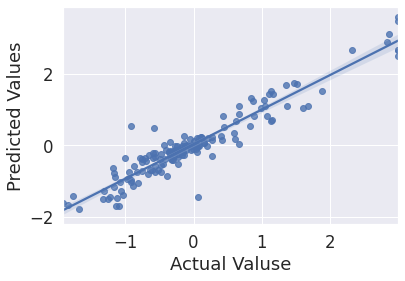

In [13]:
pred = model.predict(X_test)
sns.regplot(Y_test, pred)
plt.xlabel("Actual Valuse")
plt.ylabel("Predicted Values")
plt.show()